## T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

##  One-sample T-test with Python

This test will tell us whether means of the sample and the population are different

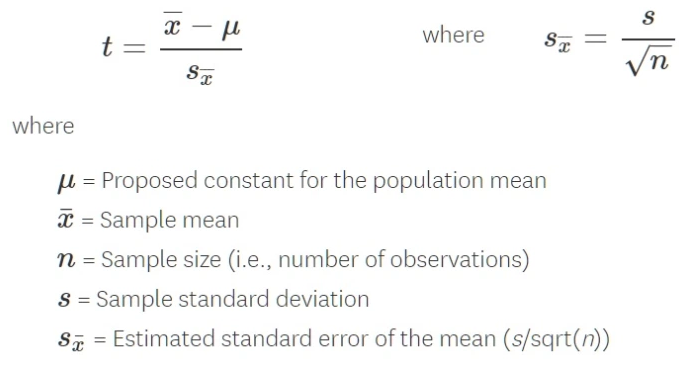

In [1]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

Is the sample age mean different from population mean?

Null hypothesis: No difference,

Alternate Hypothesis: There is difference.

In [2]:
len(ages)

32

In [3]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [4]:
## Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [5]:
age_sample

array([10, 26, 24, 23, 55, 27, 55, 28, 20, 18])

In [6]:
from scipy.stats import ttest_1samp

In [7]:
ttest,p_value=ttest_1samp(age_sample,30)

In [8]:
print(p_value)

0.7725789309079922


In [9]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Example 2
Consider the age of students in a college and in Class A

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

Null hypothesis: mean of class age is same as school average age

Alternate hypothesis: mean of class age is different as school average age

In [11]:
classA_ages.mean()

46.9

In [12]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [13]:
p_value

1.139027071016194e-13

In [14]:
school_ages.mean()

53.303333333333335

In [15]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

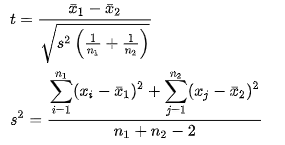

In [16]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [17]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [18]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


### Applying T-test on TikTok Data

In [19]:
import pandas as pd  
import seaborn as sns 

tiktok_data = pd.read_csv('data/tiktok.csv')
tiktok_data.head(2)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.3120,0.0461,0.0,0.180,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.224,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE


In [20]:
tiktok_data['doja_or_noja'] = tiktok_data.artist_name=='Doja Cat' # Create a column that stores if it is Doja Cat or not. 
tiktok_data.doja_or_noja.value_counts()

doja_or_noja
False    6654
True       92
Name: count, dtype: int64

Q) Are Doja cat songs more danceable than others?

Null hypothesis: danceability of group 1(used Doja cat) and danceability of group 2(not used Doja cat) is same.

Alternate Hypothesis: danceability of group 1(used Doja cat) and danceability of group 2(not used Doja cat) is different.

In [21]:
doja_X1 = tiktok_data[tiktok_data.doja_or_noja==False]
doja_X2 = tiktok_data[tiktok_data.doja_or_noja==True]

In [22]:
print(doja_X1.danceability.mean(), doja_X1.danceability.std()) # First we check the measures of central tendency to see if there is a relationship. 

0.740349113315299 0.13855559675060644


In [23]:
print(doja_X2.danceability.mean(), doja_X2.danceability.std())

0.7826739130434782 0.07237146373082283


We can also use a similar `t-test` based approach in order to answer our hypothesis - are Doja Cat songs just more danceable than other songs popular on TikTok? 

In [24]:
t, p = stats.ttest_ind(doja_X1.danceability, doja_X2.danceability)

In [25]:
t, p # t is the test statistic and p is the p-value

(-2.9243151497279807, 0.0034636445170658807)

In [26]:
print("Not Doja", doja_X1.danceability.mean(), doja_X1.danceability.std())
print("Doja", doja_X2.danceability.mean(), doja_X2.danceability.std())

Not Doja 0.740349113315299 0.13855559675060644
Doja 0.7826739130434782 0.07237146373082283


<Axes: xlabel='danceability', ylabel='Count'>

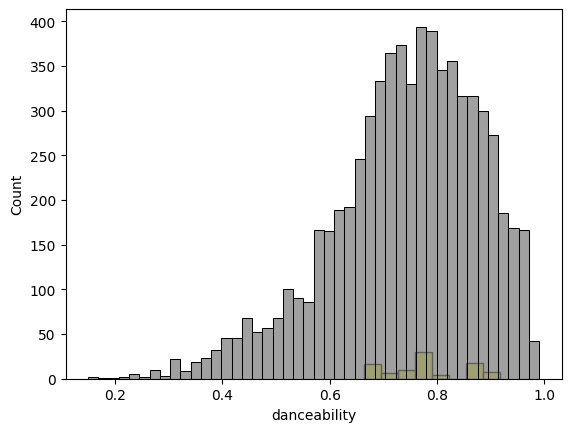

In [27]:
import seaborn as sns 

sns.histplot(doja_X2.danceability,multiple='stack',color='yellow')
sns.histplot(doja_X1.danceability,multiple='stack',color='grey')
